### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns=['EIN' ,'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
APPLICATION_counts = application_df.APPLICATION_TYPE.value_counts()
APPLICATION_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

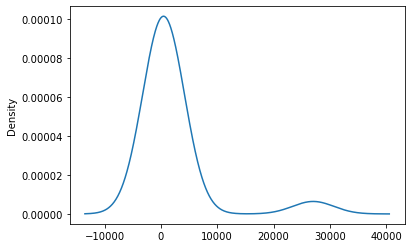

In [5]:
# Visualize the value counts of APPLICATION_TYPE
APPLICATION_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(APPLICATION_counts[APPLICATION_counts < 500].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

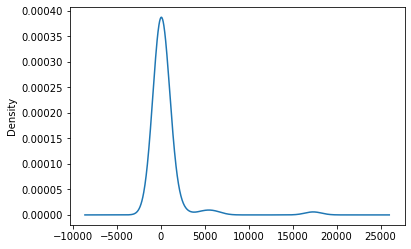

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat =application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat 

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(columns=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
X=application_df.drop(columns=["IS_SUCCESSFUL"])
y=application_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Attempt-1: Increase the number of neurons 

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 120
nodes_hidden_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="relu", input_dim=number_input_features))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               5280      
                                                                 
 dense_1 (Dense)             (None, 50)                6050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11,381
Trainable params: 11,381
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback], validation_split=0.2)

Epoch 1/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5736 - accuracy: 0.7166 - val_loss: 0.5628 - val_accuracy: 0.7349
Epoch 2/100
644/644 [==============================] - 1s 852us/step - loss: 0.5578 - accuracy: 0.7267 - val_loss: 0.5556 - val_accuracy: 0.7331
Epoch 3/100
644/644 [==============================] - 1s 815us/step - loss: 0.5557 - accuracy: 0.7281 - val_loss: 0.5515 - val_accuracy: 0.7335
Epoch 4/100
644/644 [==============================] - 1s 886us/step - loss: 0.5524 - accuracy: 0.7284 - val_loss: 0.5545 - val_accuracy: 0.7347
Epoch 5/100
597/644 [==========================>...] - ETA: 0s - loss: 0.5511 - accuracy: 0.7306
Epoch 5: saving model to checkpoints\weights.05.hdf5
644/644 [==============================] - 1s 986us/step - loss: 0.5518 - accuracy: 0.7301 - val_loss: 0.5499 - val_accuracy: 0.7368
Epoch 6/100
644/644 [==============================] - 1s 943us/step - loss: 0.5501 - accuracy: 0.7300 - val_loss: 0.5496 - val_accuracy: 0

Epoch 48/100
644/644 [==============================] - 1s 924us/step - loss: 0.5378 - accuracy: 0.7377 - val_loss: 0.5548 - val_accuracy: 0.7366
Epoch 49/100
644/644 [==============================] - 1s 891us/step - loss: 0.5384 - accuracy: 0.7381 - val_loss: 0.5559 - val_accuracy: 0.7353
Epoch 50/100
586/644 [==========================>...] - ETA: 0s - loss: 0.5375 - accuracy: 0.7389
Epoch 50: saving model to checkpoints\weights.50.hdf5
644/644 [==============================] - 1s 954us/step - loss: 0.5382 - accuracy: 0.7386 - val_loss: 0.5564 - val_accuracy: 0.7359
Epoch 51/100
644/644 [==============================] - 1s 992us/step - loss: 0.5380 - accuracy: 0.7384 - val_loss: 0.5550 - val_accuracy: 0.7364
Epoch 52/100
644/644 [==============================] - 1s 982us/step - loss: 0.5375 - accuracy: 0.7379 - val_loss: 0.5581 - val_accuracy: 0.7351
Epoch 53/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5375 - accuracy: 0.7383 - val_loss: 0.5575 - val_accu

644/644 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7398 - val_loss: 0.5854 - val_accuracy: 0.7364
Epoch 96/100
644/644 [==============================] - 1s 917us/step - loss: 0.5348 - accuracy: 0.7401 - val_loss: 0.5841 - val_accuracy: 0.7372
Epoch 97/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7399 - val_loss: 0.5921 - val_accuracy: 0.7364
Epoch 98/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5344 - accuracy: 0.7402 - val_loss: 0.6004 - val_accuracy: 0.7372
Epoch 99/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7396 - val_loss: 0.6057 - val_accuracy: 0.7359
Epoch 100/100
633/644 [============================>.] - ETA: 0s - loss: 0.5349 - accuracy: 0.7398
Epoch 100: saving model to checkpoints\weights.100.hdf5
644/644 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7400 - val_loss: 0.6000 - val_accuracy: 0.7370


In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5771 - accuracy: 0.7280 - 186ms/epoch - 694us/step
Loss: 0.5771095752716064, Accuracy: 0.7280466556549072


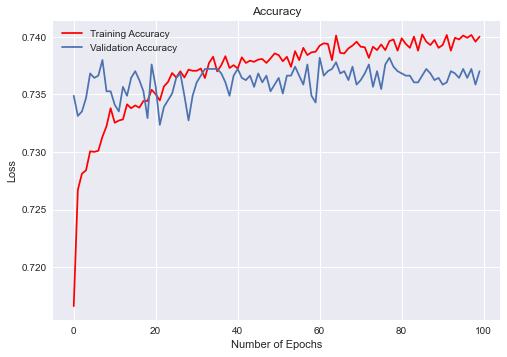

In [19]:
# plot training and validation accuracies
plt.style.use("seaborn")
plt.title("Accuracy")
plt.plot(fit_model.history["accuracy"], "r", label="Training Accuracy")
plt.plot(fit_model.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("Resources/accuracy.png")
plt.show()

# Attempt-2: Add-hidden layes

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 80
nodes_hidden_layer2 = 30
nodes_hidden_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="relu", input_dim=number_input_features))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="relu"))

# Second third layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback], validation_split=0.2)

Epoch 1/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5756 - accuracy: 0.7151 - val_loss: 0.5528 - val_accuracy: 0.7312
Epoch 2/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5573 - accuracy: 0.7278 - val_loss: 0.5484 - val_accuracy: 0.7347
Epoch 3/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7288 - val_loss: 0.5498 - val_accuracy: 0.7372
Epoch 4/100
644/644 [==============================] - 1s 994us/step - loss: 0.5526 - accuracy: 0.7290 - val_loss: 0.5489 - val_accuracy: 0.7362
Epoch 5/100
588/644 [==========================>...] - ETA: 0s - loss: 0.5508 - accuracy: 0.7301
Epoch 5: saving model to checkpoints\weights.05.hdf5
644/644 [==============================] - 1s 944us/step - loss: 0.5505 - accuracy: 0.7301 - val_loss: 0.5490 - val_accuracy: 0.7353
Epoch 6/100
644/644 [==============================] - 1s 924us/step - loss: 0.5497 - accuracy: 0.7315 - val_loss: 0.5504 - val_accuracy: 0.732

644/644 [==============================] - 1s 1ms/step - loss: 0.5389 - accuracy: 0.7355 - val_loss: 0.5605 - val_accuracy: 0.7345
Epoch 49/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5386 - accuracy: 0.7375 - val_loss: 0.5588 - val_accuracy: 0.7368
Epoch 50/100
639/644 [============================>.] - ETA: 0s - loss: 0.5387 - accuracy: 0.7374
Epoch 50: saving model to checkpoints\weights.50.hdf5
644/644 [==============================] - 1s 1ms/step - loss: 0.5385 - accuracy: 0.7377 - val_loss: 0.5630 - val_accuracy: 0.7362
Epoch 51/100
644/644 [==============================] - 1s 957us/step - loss: 0.5382 - accuracy: 0.7382 - val_loss: 0.5636 - val_accuracy: 0.7362
Epoch 52/100
644/644 [==============================] - 1s 941us/step - loss: 0.5385 - accuracy: 0.7376 - val_loss: 0.5649 - val_accuracy: 0.7366
Epoch 53/100
644/644 [==============================] - 1s 967us/step - loss: 0.5383 - accuracy: 0.7380 - val_loss: 0.5594 - val_accuracy: 0.7353
Epoc

Epoch 96/100
644/644 [==============================] - 1s 957us/step - loss: 0.5356 - accuracy: 0.7402 - val_loss: 0.5617 - val_accuracy: 0.7370
Epoch 97/100
644/644 [==============================] - 1s 955us/step - loss: 0.5354 - accuracy: 0.7397 - val_loss: 0.5659 - val_accuracy: 0.7378
Epoch 98/100
644/644 [==============================] - 1s 944us/step - loss: 0.5353 - accuracy: 0.7394 - val_loss: 0.5661 - val_accuracy: 0.7380
Epoch 99/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7389 - val_loss: 0.5585 - val_accuracy: 0.7364
Epoch 100/100
617/644 [===========================>..] - ETA: 0s - loss: 0.5358 - accuracy: 0.7388
Epoch 100: saving model to checkpoints\weights.100.hdf5
644/644 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7396 - val_loss: 0.5753 - val_accuracy: 0.7370


In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5676 - accuracy: 0.7276 - 171ms/epoch - 639us/step
Loss: 0.5676363706588745, Accuracy: 0.727580189704895


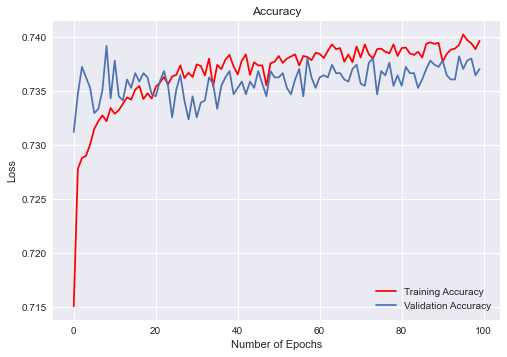

In [24]:
# Another Chart of what
# Defined style for plot
plt.style.use("seaborn")
plt.title("Accuracy")
plt.plot(fit_model.history["accuracy"], "r", label="Training Accuracy")
plt.plot(fit_model.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("Resources/accuracy2.png")
plt.show()

# Attempt-3:change  activation functions for the hidden layers

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 80
nodes_hidden_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="tanh", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                3520      
                                                                 
 dense_8 (Dense)             (None, 30)                2430      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback], validation_split=0.2)

Epoch 1/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5789 - accuracy: 0.7130 - val_loss: 0.5567 - val_accuracy: 0.7335
Epoch 2/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5608 - accuracy: 0.7274 - val_loss: 0.5511 - val_accuracy: 0.7370
Epoch 3/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5556 - accuracy: 0.7265 - val_loss: 0.5471 - val_accuracy: 0.7374
Epoch 4/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7289 - val_loss: 0.5501 - val_accuracy: 0.7349
Epoch 5/100
598/644 [==========================>...] - ETA: 0s - loss: 0.5504 - accuracy: 0.7307
Epoch 5: saving model to checkpoints\weights.05.hdf5
644/644 [==============================] - 1s 938us/step - loss: 0.5519 - accuracy: 0.7290 - val_loss: 0.5499 - val_accuracy: 0.7304
Epoch 6/100
644/644 [==============================] - 1s 930us/step - loss: 0.5504 - accuracy: 0.7294 - val_loss: 0.5491 - val_accuracy: 0.7376


644/644 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.7381 - val_loss: 0.5491 - val_accuracy: 0.7355
Epoch 49/100
644/644 [==============================] - 2s 2ms/step - loss: 0.5365 - accuracy: 0.7375 - val_loss: 0.5474 - val_accuracy: 0.7361
Epoch 50/100
612/644 [===========================>..] - ETA: 0s - loss: 0.5371 - accuracy: 0.7377
Epoch 50: saving model to checkpoints\weights.50.hdf5
644/644 [==============================] - 1s 2ms/step - loss: 0.5359 - accuracy: 0.7387 - val_loss: 0.5466 - val_accuracy: 0.7368
Epoch 51/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5362 - accuracy: 0.7384 - val_loss: 0.5473 - val_accuracy: 0.7370
Epoch 52/100
644/644 [==============================] - 1s 2ms/step - loss: 0.5361 - accuracy: 0.7394 - val_loss: 0.5498 - val_accuracy: 0.7349
Epoch 53/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7391 - val_loss: 0.5471 - val_accuracy: 0.7366
Epoch 54/1

644/644 [==============================] - 1s 1ms/step - loss: 0.5329 - accuracy: 0.7404 - val_loss: 0.5511 - val_accuracy: 0.7370
Epoch 96/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7398 - val_loss: 0.5508 - val_accuracy: 0.7337
Epoch 97/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7404 - val_loss: 0.5510 - val_accuracy: 0.7366
Epoch 98/100
644/644 [==============================] - 1s 1ms/step - loss: 0.5326 - accuracy: 0.7398 - val_loss: 0.5499 - val_accuracy: 0.7374
Epoch 99/100
644/644 [==============================] - 1s 951us/step - loss: 0.5333 - accuracy: 0.7405 - val_loss: 0.5503 - val_accuracy: 0.7378
Epoch 100/100
602/644 [===========================>..] - ETA: 0s - loss: 0.5327 - accuracy: 0.7394
Epoch 100: saving model to checkpoints\weights.100.hdf5
644/644 [==============================] - 1s 919us/step - loss: 0.5326 - accuracy: 0.7395 - val_loss: 0.5509 - val_accuracy: 0.7359


In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5600 - accuracy: 0.7272 - 156ms/epoch - 582us/step
Loss: 0.5599635243415833, Accuracy: 0.7272303104400635


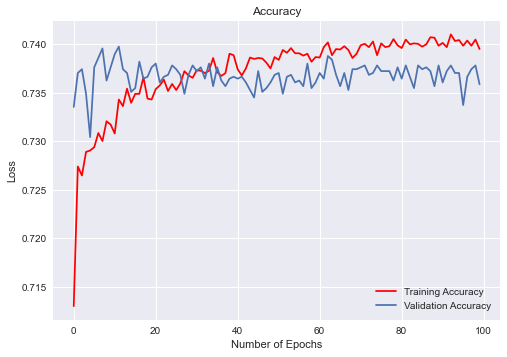

In [29]:
# Defined style for plot
plt.style.use("seaborn")
plt.title("Accuracy")
plt.plot(fit_model.history["accuracy"], "r", label="Training Accuracy")
plt.plot(fit_model.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("Resources/accuracy3.png")
plt.show()

In [30]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")